## Fourier transform
Although the Fourier series has been quite fascinating, there was a shortcoming - it was only applicable for periodic signals and could only account for frequency components that were integer multiples of the fundamental. The Fourier transform on the other hand is more general in that it allows for analysis/synthesis of any type of signal and it can represent a continuous frequency spectrum. We'll explore what all of this means in this notebook and derive the foundational tool for audio signal analysis - the Fourier transform.

In [ ]:
# Importing the packages as usual
%pip install ipympl
import numpy as np 
from matplotlib import pyplot as plt
from  matplotlib import patches, collections
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter
from ipywidgets import * # interactive plots
import IPython
from matplotlib import animation
import IPython
from IPython.display import Audio, HTML
%matplotlib ipympl

# This is a CSS style for the animation controls in this notebook.
controls_css = """
<style>
.anim-controls button {
    font-size: 4px !important;
    padding: 2px 10px !important;
}
.anim-controls {
    margin-top: 4px;
}
</style>
"""

### The discrete frequency spectrum of the Fourier series

Let's start by considering the Fourier series of the periodic signal, $f(t)$, illustrated in Fig. 1. This is a pulse-train type signal with period T_{o} and can be mathematically represented as 

$\begin{equation}
f(t) = \begin{cases}
 1 & -T_{p} < t \leq T_{p} \\
 0 & T_{p} < t \leq T_{o}/2 \\
 \end{cases}
\end{equation}$

<div>
<center> <img src="pulse_wave.png" width="600"/> <center/>
    <p style="text-align:center">Fig. 1 - A pulse-train type signal with period T<sub>o</sub>. </p>
</div>

<br>

Let's compute the coefficients of the Fourier series using the complex exponential form. Recall the formula to find the coefficients $c_n$:

$\begin{equation} 
	c_n =\frac{1}{T_o}\int_{-T_o/2}^{T_o/2}f(t)e^{-jn\omega_o t}\text{d}t
\end{equation}$

After working through is integral (your homework), we find that the coefficients $c_n$ are given by (note that $c_n$ has no imaginary parts, only real values):

$\begin{align}
c_o &= \frac{2  T_{p} } { T_o}\\
c_n &= \frac{2 \sin(n\omega_{o} T_{p}) } {n \omega_{o} T_o} & n \neq 0
\end{align}$

Let's plot the values of the $c_n$ coefficients against angular frequency when $T_p = 0.5$ and $T_o = 2$. This is the amplitude spectrum of our signal, $f(t)$ and is shown in Fig. 2. It tells us something about how the strength of the sinusoids is distributed across frequency. (In general, $c_n$ is complex-valued, and in that case we tend to plot two things - the magnitude spectrum and the phase spectrum, i.e., the magnitude and phase of $c_n$ against frequency). 

<br>
<div>
<center> <img src="pulse_wave_spec.png" width="600"/> <center/>
    <p style="text-align:center">Fig. 2 - Amplitude spectrum of f(t). </p>
</div>

<br>

There are a few important things to highlight in this plot:

1. The spectrum only consists of **integer multiples** of $\omega_o$, i.e. $n \omega_o$ for for $n = 0, \pm 1, \pm 2, \dots \pm \infty$  

2. Hence we can think of the spectrum as **discrete** - only values at discrete frequencies, $n \omega_o$ can be used to represent $f(t)$. Frequencies in between these discrete values are undefined and cannot be used to represent $f(t)$

3. This is a direct consequence of the fact that we are dealing with periodic signals with a period $T_o = 2 \pi /\omega_o$ 


### From the Fourier Series to the Fourier Transform (1)

We know that signals we encounter on an everyday basis are not always periodic. For more complicated signals in comparison to the ones we’ve seen, there may not be a fundamental period that one can identify. We call such signals **aperiodic**. So how can we obtain the frequency content of aperiodic signals? Can we develop a similar framework to Fourier Series in order to treat aperiodic signals?

This is where the **Fourier transform** comes in to help us. We can think of the Fourier Transform as generalization of the Fourier Series that can also deal with aperiodic signals. It's not always so intuitive, but we'll use some interactive plots to hopefully clear this up. 

Let’s start by making an aperiodic signal from a periodic one. We'll use the same pulse-train type signal from above. In order to do this, we make the period infinite, i.e. we set $T_{o} \rightarrow \infty$. In practical terms, what that means is that the period is much larger than the window of time for which we are observing the signal. Run the interactive plot below and increase $T_o$ to see how we go from the periodic signal of the pulse-train to an aperiodic one, represented by a single pulse. 

See how the signal changes as we increase the period:


interactive(children=(FloatSlider(value=2.0, description='To', max=20.0, min=2.0), Output()), _dom_classes=('w…

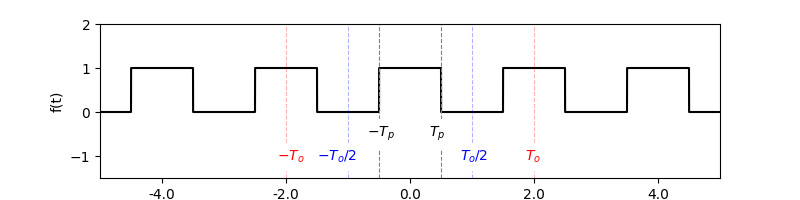

In [14]:

Tp = 0.5 # Pulse Width
To = 2

# The functions were taken from here (thanks!): https://stackoverflow.com/questions/29698213/rectangular-pulse-train-in-python
def rect(Tp):
    """ a function to return a centered rectangular pulse of width Tp """
    return lambda t: (-Tp <= t) & (t < Tp)

def pulse_train(t, at, shape):
    """create a train of pulses over t at times at and shape """
    return np.sum(shape(t - at[:,np.newaxis]), axis=0)

fig, axes = plt.subplots(figsize=(8, 2))

# Time domain plots
dt = 0.0001 # time spacing
t = np.arange(-5*To, 5*To, dt) # Range of times to plot 
line, = axes.plot([], [], 'k')
vline = axes.axvline(To, color='red', linestyle='--', linewidth=0.8,alpha=0.3)  # Draw horizontal line at y=0
vline2 = axes.axvline(-To, color='red', linestyle='--', linewidth=0.8,alpha=0.3)  # Draw horizontal line at y=0
label1 = axes.text(To-0.2, -1.2, '$T_{o}$', color='red', ha='left', va='bottom', backgroundcolor='white')
label2 = axes.text(-To-0.2, -1.2, '$-T_{o}$', color='red', ha='left', va='bottom', backgroundcolor='white')

vline3 = axes.axvline(To/2, color='blue', linestyle='--', linewidth=0.8, alpha=0.3)  # Draw horizontal line at y=0
vline4 = axes.axvline(-(To/2), color='blue', linestyle='--', linewidth=0.8, alpha=0.3)  # Draw horizontal line at y=0
label3 = axes.text((To/2)-0.2, -1.2, '$T_{o}/2$', color='blue', ha='left', va='bottom', backgroundcolor='white')
label4 = axes.text(-(To/2)-0.5, -1.2, '$-T_{o}/2$', color='blue', ha='left', va='bottom', backgroundcolor='white')

vline5 = axes.axvline(Tp, color='grey', linestyle='--', linewidth=0.8)  # Draw horizontal line at y=0
vline6 = axes.axvline(-Tp, color='grey', linestyle='--', linewidth=0.8)  # Draw horizontal line at y=0

label5 = axes.text(Tp-0.2, -0.7, '$T_{p}$', color='black',  ha='left', va='bottom', backgroundcolor='white')
label6 = axes.text(-Tp-0.2, -0.7, '$-T_{p}$', color='black', ha='left', va='bottom', backgroundcolor='white')


axes.set_ylabel('f(t)', color='k')
axes.set_xlabel('Time (s)', color='k')
axes.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes.set_xlim([-5, 5])
axes.set_ylim([-1.5, 2])


def update(To = 2):
    
    # Time domain plots
    
    y = pulse_train(t=t,at=np.arange(-5*To, 5*To, To),shape=rect(Tp))
    fig.canvas.draw_idle()
    line.set_data(t, y)
    
    vline.set_xdata([To, To])
    vline2.set_xdata([-To, -To])
    label1.set_x(To-0.15)
    label2.set_x(-To-0.15)
    vline3.set_xdata([To/2, To/2])
    vline4.set_xdata([-To/2, -To/2])
    label3.set_x((To/2)-0.2)
    label4.set_x(-(To/2)-0.5)
    


print('See how the signal changes as we increase the period:')
interact(update, To = (2,20,0.1)); 



### From the Fourier Series to the Fourier Transform (2)

Okay so we have set $T_{o} \rightarrow \infty$. What consequences does this have on the math for computing the coefficients, $c_n$ from the Fourier series analysis equation? Recall the formula for $c_n$:

$\begin{equation} 
	c_n =\frac{1}{T_o}\int_{-T_o/2}^{T_o/2}f(t)e^{-jn\omega_o t}\text{d}t
\end{equation}$

The first thing we can observe is that the limits of the integral will change. We can also multiply out by $T_o$ to simplify things a bit:

$\begin{align} 
	\lim_{T_o \rightarrow \infty} c_n &=\frac{1}{T_o}\int_{-\infty}^{\infty}f(t)e^{-jn\omega_o t}\text{d}t \\
	\lim_{T_o \rightarrow \infty} T_o c_n &=\int_{-\infty}^{\infty}f(t)e^{-jn\omega_o t}\text{d}t
\end{align}$

Now recall that $\omega_o = 2\pi/T_o$, which means that
$\begin{align} 
	\lim_{T_o \rightarrow \infty} \omega_o &= \frac{2\pi}{T_o} = 0  
	\end{align}$

That all feels really weird, but here is the key - in the Fourier Series, **the spacing between the discrete frequencies is also $\omega_o$ (shown in Fig. 3) and hence the spacing between these discrete frequencies decreases**, i.e. it also tends to 0.

<br>
<div>
<center> <img src="pulse_wave_spec_wospacing.png" width="600"/> <center/>
    <p style="text-align:center">Fig. 2 - Amplitude spectrum of f(t) explicitly showing spacing between components. </p>
</div>

<br>

Let's visualize what we mean in the following interactive plot. Change $T_o$ and see how things change in both the time and frequency domain.

See how the signal changes as we increase the period:


interactive(children=(FloatSlider(value=2.0, description='To', max=20.0, min=2.0), Output()), _dom_classes=('w…

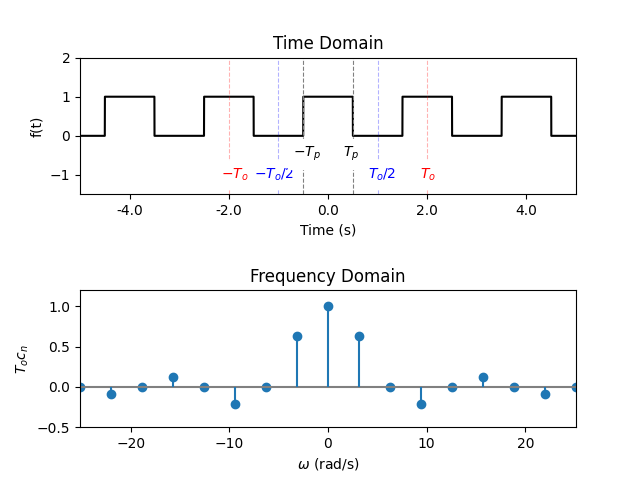

In [16]:
Tp = 0.5 # Pulse Width

fig, axes = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.7)

# Time domain plots

dt = 0.0001 # time spacing
t = np.arange(-5*To, 5*To, dt) # Range of times to plot 
line, = axes[0].plot([], [], 'k')
vline = axes[0].axvline(To, color='red', linestyle='--', linewidth=0.8,alpha=0.3)  # Draw horizontal line at y=0
vline2 = axes[0].axvline(-To, color='red', linestyle='--', linewidth=0.8,alpha=0.3)  # Draw horizontal line at y=0
label1 = axes[0].text(To-0.2, -1.2, '$T_{o}$', color='red', ha='left', va='bottom', backgroundcolor='white')
label2 = axes[0].text(-To-0.2, -1.2, '$-T_{o}$', color='red', ha='left', va='bottom', backgroundcolor='white')

vline3 = axes[0].axvline(To/2, color='blue', linestyle='--', linewidth=0.8, alpha=0.3)  # Draw horizontal line at y=0
vline4 = axes[0].axvline(-(To/2), color='blue', linestyle='--', linewidth=0.8, alpha=0.3)  # Draw horizontal line at y=0
label3 = axes[0].text((To/2)-0.2, -1.2, '$T_{o}/2$', color='blue', ha='left', va='bottom', backgroundcolor='white')
label4 = axes[0].text(-(To/2)-0.5, -1.2, '$-T_{o}/2$', color='blue', ha='left', va='bottom', backgroundcolor='white')

vline5 = axes[0].axvline(Tp, color='grey', linestyle='--', linewidth=0.8)  # Draw horizontal line at y=0
vline6 = axes[0].axvline(-Tp, color='grey', linestyle='--', linewidth=0.8)  # Draw horizontal line at y=0

label5 = axes[0].text(Tp-0.2, -0.7, '$T_{p}$', color='black',  ha='left', va='bottom', backgroundcolor='white')
label6 = axes[0].text(-Tp-0.2, -0.7, '$-T_{p}$', color='black', ha='left', va='bottom', backgroundcolor='white')


axes[0].set_ylabel('f(t)', color='k')
axes[0].set_xlabel('Time (s)', color='k')
axes[0].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes[0].set_xlim([-5, 5])
axes[0].set_ylim([-1.5, 2])
axes[0].set_title('Time Domain', color='k')


# Freq domain plots

f_int = np.arange(-100, 101, 1) # Range of integer frequencies to plot
T_ak = np.zeros(len(f_int))

markers, = axes[1].plot([],[], ls="none", marker="o")
baseline = axes[1].axhline(0, color="grey")

verts=np.c_[f_int, np.zeros_like(f_int), f_int, T_ak].reshape(len(T_ak),2,2)
col = collections.LineCollection(verts)
axes[1].add_collection(col)


line_Freq, = axes[1].plot([], [], 'b')
axes[1].set_xlim([-2*4*np.pi, 2*4*np.pi])
axes[1].set_ylim([-0.5, 1.2])
axes[1].set_ylabel('$T_o  c_n$', color='k')
axes[1].set_xlabel('$\omega$ (rad/s)', color='k')
axes[1].set_title('Frequency Domain', color='k')

def update(To = 2):
    
    # Time domain plots
    
    y = pulse_train(t=t,at=np.arange(-5*To, 5*To, To),shape=rect(Tp))
    fig.canvas.draw_idle()
    line.set_data(t, y)
    
    vline.set_xdata([To, To])
    vline2.set_xdata([-To, -To])
    label1.set_x(To-0.15)
    label2.set_x(-To-0.15)
    vline3.set_xdata([To/2, To/2])
    vline4.set_xdata([-To/2, -To/2])
    label3.set_x((To/2)-0.2)
    label4.set_x(-(To/2)-0.5)
    
    
    # Frequency Domain plots
    wo = (2*np.pi)/To
    
    for n in range(len(f_int)):
        k = f_int[n]
        if k == 0:
            T_ak[n] = (2*Tp)
        else:
            T_ak[n] = (2*np.sin(k*wo*Tp))/(k*wo)
    
    markers.set_data(f_int*wo, T_ak)
    verts=np.c_[f_int*wo, np.zeros_like(f_int*wo), f_int*wo, T_ak].reshape(len(f_int*wo),2,2)
    col.set_segments(verts)
        

print('See how the signal changes as we increase the period:')
interact(update, To = (2,20,0.1)); 



### From the Fourier Series to the Fourier Transform (3)

We essentially have gone from a discrete spectrum to a continuous one, i.e, as $T_o \rightarrow \infty$, $n \omega_o \rightarrow \omega$. This now means we can accommodate for any frequency! No longer are we constrained to integer multiples of $\omega_o$. Returning to the math, what we end up with is

$\begin{align} 
	\lim_{T_o \rightarrow \infty} T_o c_n &=\int_{-\infty}^{\infty}f(t)e^{-j\omega t}\text{d}t
\end{align}$

This integral is what we call the **Fourier transform**! Conventionally, we write it as follows
$\begin{align} 
	F(j \omega) &=\int_{-\infty}^{\infty}f(t)e^{-j\omega t}\text{d}t
\end{align}$

It's still an audio analysis equation, i.e., it takes an input of the time-domain signal, $f(t)$ and spits out a complex number, $F(j\omega)$ for each value of $\omega$, i.e., at all frequencies along a continuum (recall that $\omega = 2 \pi f$, where $f$ is the frequency in Hz). This allows us to quantify the magnitude and phase of our signal across frequency. Just as in the Fourier series, we can interpret this integral as computing a correlation between the signal $f(t)$ and a complex exponential, but now at any frequency $\omega$. 

On a side note, it's a matter of convention on how you will see it in literature. Here I'm writing the left-hand side as a function of $j \omega$ to remind us that the values we obtain are complex-valued and as a function of frequency. Recall also that $\omega = 2 \pi f$, where $f$ is the frequency in Hz. Hence in some literature, you may find the left-hand side written as $F(jf)$, $F(f)$ or simply $F(\omega)$.  

We can also go the other way around and do synthesis if we have $F(j\omega)$. This is what we call the **inverse Fourier transform** and is given by

$\begin{align} 
	f(t) &= \frac{1}{2\pi} \int_{-\infty}^{\infty}F(j\omega) e^{j  \omega \color{black}t}\text{d}\omega
\end{align}$


See how the spectrum changes as we compress/expand signal:


interactive(children=(FloatSlider(value=0.5, description='Tp', max=2.0, min=0.5), Output()), _dom_classes=('wi…

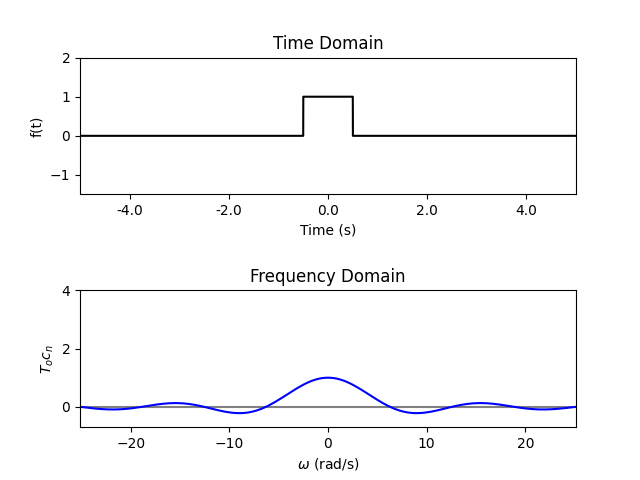

In [17]:
Tp = 0.5 # Pulse Width

fig, axes = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.7)

# Time domain plots

dt = 0.0001 # time spacing
t = np.arange(-5*To, 5*To, dt) # Range of times to plot 
line, = axes[0].plot([], [], 'k')
axes[0].set_ylabel('f(t)', color='k')
axes[0].set_xlabel('Time (s)', color='k')
axes[0].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes[0].set_xlim([-5, 5])
axes[0].set_ylim([-1.5, 2])
axes[0].set_title('Time Domain', color='k')


# Freq domain plots

f_int = np.arange(-100, 101, 1) # Range of integer frequencies to plot
T_ak = np.zeros(len(f_int))

markers, = axes[1].plot([],[], ls="none", marker="o")
baseline = axes[1].axhline(0, color="grey")


line_Freq, = axes[1].plot([], [], 'b')
axes[1].set_xlim([-2*4*np.pi, 2*4*np.pi])
axes[1].set_ylim([-0.7, 4])
axes[1].set_ylabel('$T_o  c_n$', color='k')
axes[1].set_xlabel('$\omega$ (rad/s)', color='k')
axes[1].set_title('Frequency Domain', color='k')

def update(Tp = 0.5):
    
    # Time domain plots
    To = 20
    
    y = pulse_train(t=t,at=np.arange(-5*To, 5*To, To),shape=rect(Tp))
    fig.canvas.draw_idle()
    line.set_data(t, y)
    
    # Frequency Domain plots
    wo = (2*np.pi)/To
    
    for n in range(len(f_int)):
        k = f_int[n]
        if k == 0:
            T_ak[n] = (2*Tp)
        else:
            T_ak[n] = (2*np.sin(k*wo*Tp))/(k*wo)

    line_Freq.set_data(f_int*wo, T_ak)
    

print('See how the spectrum changes as we compress/expand signal:')
interact(update, Tp = (0.5,2,0.1)); 

